In [2]:
#Khai báo thư viện
#thư viên xử lý ma trận
import numpy as np
#thư viện đọc địa chỉ hình ảnh
import os
#thư viện xử lý về hình ảnh
from PIL import Image
#thư viện dùng để vẽ
import matplotlib.pyplot as plt
#thư viện hàm chạy mô hình 
from keras.models import Sequential
#thư viện tạo mảng noron
from keras.layers import Dense,Activation,Dropout
#thư viện dành cho phương pháp trọng số
from tensorflow.keras.optimizers import RMSprop
#thư viện gọi hàm dừng sớm
from keras.callbacks import EarlyStopping
#thư viện phân loại ảnh
from keras.backend import categorical_crossentropy
# thư viện xử lý chuyển class
from keras.utils import np_utils
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam

In [3]:
#khai bien doc dia chi
#địa chỉ train
train_data ='drive/MyDrive/bai tap ve nha/hinh1/train'
#địa chỉ test
test_data='drive/MyDrive/bai tap ve nha/hinh1/test'
#địa chỉ validation
validation_data='drive/MyDrive/bai tap ve nha/hinh1/validation'

In [4]:
#lệnh liên kết driver
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
listdata_train=[]
listdata_test=[]
listdata_validation=[]
dict={'linh':[0],'tai':[1],'toan':[2]}

In [6]:
def Getdata(dirdata,lstdata):
#doc hinh anh trong tap du lieu
  for whatever in os.listdir(dirdata):
      whatever_path = os.path.join(dirdata,whatever)
      lst_filename_path=[]
      for filename in os.listdir(whatever_path):
        filename_path=os.path.join(whatever_path,filename)
        label=filename_path.split('/')[5]
        img = np.array(Image.open(filename_path))
        lst_filename_path.append((img,dict[label]))
      lstdata.extend(lst_filename_path)
  for i in range(3):
      np.random.shuffle(lstdata)
  return lstdata

In [7]:
listdata_train=Getdata(train_data,listdata_train)
listdata_test=Getdata(test_data,listdata_test)
listdata_validation=Getdata(validation_data,listdata_validation)

In [8]:
x_train=np.array([x[0] for _ ,x in enumerate(listdata_train)])
y_train=np.array([y[1] for _ ,y in enumerate(listdata_train)])
y_train.shape

(115, 1)

In [9]:
x_test=np.array([x[0] for _ ,x in enumerate(listdata_test)])
y_test=np.array([y[1] for _ ,y in enumerate(listdata_test)])

In [10]:
x_validation=np.array([x[0] for _ ,x in enumerate(listdata_validation)])
y_validation=np.array([y[1] for _ ,y in enumerate(listdata_validation)])
x_validation.shape

(30, 150, 150, 3)

In [11]:
yname=y_train.flatten()

In [12]:
class_names=['linh','tai','toan']
x_pre=x_test
y_pre=y_test
y_pre

array([[2],
       [2],
       [0],
       [2],
       [2],
       [1],
       [1],
       [1],
       [2],
       [0],
       [1],
       [2],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [2],
       [0],
       [1],
       [2],
       [2],
       [0],
       [0],
       [1],
       [2],
       [1],
       [0]])

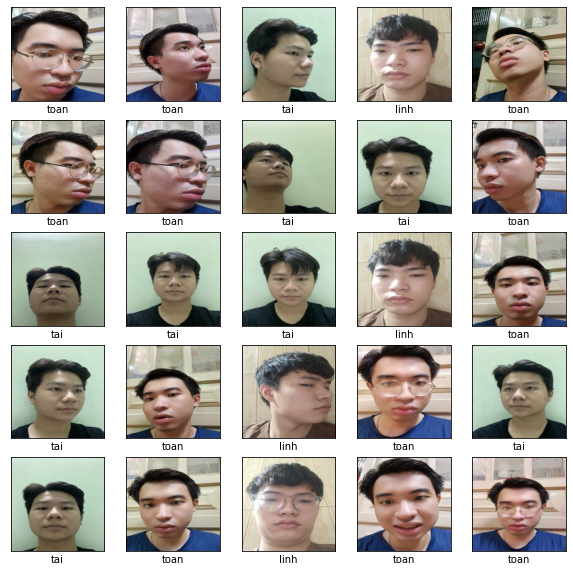

In [13]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap='binary')
    plt.xlabel(class_names[yname[i]])
plt.show()

In [14]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_validation=x_validation.astype('float32')
x_train/=255
x_test/=255
x_validation/=255
y_train=np_utils.to_categorical(y_train,3)
y_test= np_utils.to_categorical(y_test,3)
y_validation= np_utils.to_categorical(y_validation,3)

In [15]:
model=Sequential()
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) # Tích chập 32 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) # Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) # Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 128)      0         
 2D)                                                    

In [16]:
model.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(x_train,y_train,epochs=100,batch_size=70,verbose=1, validation_data=(x_validation,y_validation), callbacks=[EarlyStopping(monitor='val_loss', patience=20)]) 

Epoch 1/100
2/2 [==============================] - 23s 6s/step - loss: 57.8052 - accuracy: 0.3652 - val_loss: 27.1614 - val_accuracy: 0.3333
Epoch 2/100
2/2 [==============================] - 1s 260ms/step - loss: 19.5537 - accuracy: 0.2957 - val_loss: 1.6993 - val_accuracy: 0.3333
Epoch 3/100
2/2 [==============================] - 1s 258ms/step - loss: 1.4565 - accuracy: 0.3652 - val_loss: 1.1661 - val_accuracy: 0.3333
Epoch 4/100
2/2 [==============================] - 1s 254ms/step - loss: 1.1268 - accuracy: 0.4522 - val_loss: 1.0760 - val_accuracy: 0.3333
Epoch 5/100
2/2 [==============================] - 1s 255ms/step - loss: 1.0076 - accuracy: 0.4957 - val_loss: 1.0993 - val_accuracy: 0.3333
Epoch 6/100
2/2 [==============================] - 1s 256ms/step - loss: 1.1105 - accuracy: 0.3478 - val_loss: 0.8634 - val_accuracy: 0.8000
Epoch 7/100
2/2 [==============================] - 1s 253ms/step - loss: 0.8338 - accuracy: 0.6435 - val_loss: 0.7113 - val_accuracy: 0.7333
Epoch 8/100


In [ ]:
model.save("Nhan_dien_nguoi.h5")
model_nhandien=load_model('Nhan_dien_nguoi.h5')

In [ ]:
Score=model_nhandien.evaluate(x_test,y_test,verbose=0)
print('Test loss',Score[0])
print('Test accuary', Score[1])

In [ ]:
plt.figure(figsize=(20, 20))
for i in range(30):
    plt.subplot(10, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_pre[i], cmap='binary')
    plt.title("Model dự đoán là: " + str(class_names[np.argmax(model_nhandien.predict(x_pre[i].reshape((-1,150,150,3,))))]))
plt.show()